In [2]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy import optimize
import matplotlib.ticker as ticker

In [4]:
lam = 550*10**(-9) 
F = 0.65

In [8]:
def best():
    return np.sqrt(2.44 * lam * F)
D_best = best()
D_best

0.0009339700209321496

In [12]:
def best():
    return 1.8*np.sqrt(  lam * F)
D_best1 = best()
D_best1


0.0010762434668791258

In [320]:
angle = np.array([0.001736, 0.001388, 0.001811, 0.002777, 0.003906,0.006944,0.008333])

dots = np.array([0.00045, 0.001, 0.002, 0.003, 0.005, 0.009, 0.01])

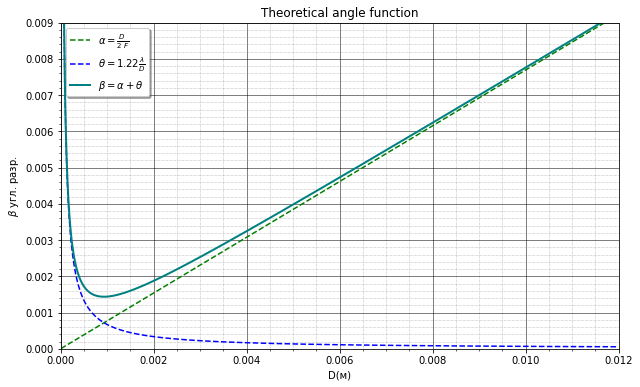

In [338]:
def geom(x):
    return x/(2*F)

def difr(x):
    return 1.22 * lam/(x)
def summ(x):
    return geom(x)+difr(x)
    
D = np.arange(0.00001, 0.012, 0.00001)

res = []
for i in range(len(D)):
    res.append(difr(D[i]) + geom(D[i]))


# график
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(D, geom(D), 'g--')
ax.plot(D, difr(D), 'b--')
ax.plot(D, res, 'teal', lw = 2)

lgnd = ax.legend([r'$\alpha = \frac{D}{2 \; F}$',r'$\theta = 1.22 \frac{\lambda}{D}$',r'$\beta = \alpha + \theta$'], loc='best', shadow=True)

ax.set_title('Theoretical angle function')
ax.set_ylabel(r'$\beta$ угл. разр.')
ax.set_xlabel('D(м)')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
# plt.errorbar(dots, angle, fmt = 'ro', markersize = '5', yerr = 0, capsize = 2, elinewidth = 2, capthick = 1, ecolor = 'violet')
#plt.errorbar(days2, Infected_2, fmt = 'ro', markersize = '2', yerr = 0, capsize = 2, elinewidth = 2, capthick = 1, ecolor = 'violet')

plt.xlim (0, 0.012)
plt.ylim (0, 0.009)
plt.savefig('gr1.png', dpi=400, quality=100)
plt.show()

In [290]:
summ(0.001)*60*57.3

4.951513384615384

In [246]:
summ(0.01) # разрешающий угол камеры теоритическая при определенном размере отверстия

0.0077594076923076915

In [313]:
l = 0.025
L = 7.2
theta = l/(2*L)
print(theta) # разрешающий угол камеры в эксперименте

0.0017361111111111112


In [264]:
L_new = l/(2*summ(0.001))
L_new

8.679164663782514

a =  6.586267966105697e-07
b =  0.8054211792004252
c =  -8.170590496594762e-05
sigma_a =  1.9116028553002534e-07
sigma_b =  0.03824167149292069
sigma_c =  0.00028359892191018717
Stand_error =  0.00019120013780184
Relative S_r a = %  29.02406742540326
Relative S_r b = %  4.748034007608886
Relative S_r c = %  347.0972165700656


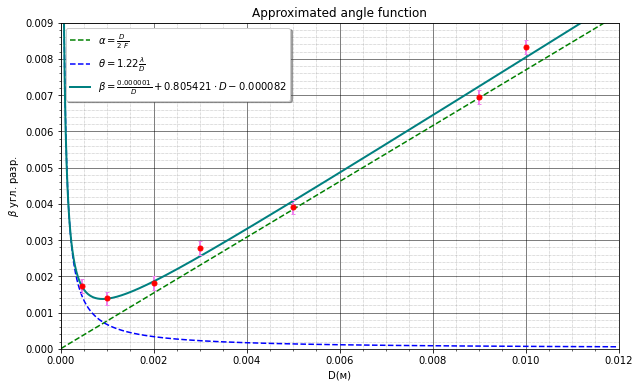

In [339]:
def approx(x, a, b, c):
    return a/x + b*x + c
beta_opt1, beta_cov1 = curve_fit(approx, dots, angle)
a = beta_opt1[0]
b = beta_opt1[1]
c = beta_opt1[2]

print('a = ', a)
print('b = ', b)
print('c = ', c)


#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])
sigma_c = np.sqrt(beta_cov1[2,2])

print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)
print('sigma_c = ', sigma_c)

more_dots = D
residuals1 = angle - approx(dots,*beta_opt1)
fres1 = sum(residuals1**2)
Stand_error = np.sqrt(fres1/len(dots))
print('Stand_error = ', Stand_error)

print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))
print('Relative S_r c = % ', 100* sigma_c/abs(c))




# график
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(D, geom(D), 'g--')
ax.plot(D, difr(D), 'b--')
ax.plot(D, approx(D, *beta_opt1), 'teal', lw = 2)

lgnd = ax.legend([r'$\alpha = \frac{D}{2 \; F}$',r'$\theta = 1.22 \frac{\lambda}{D}$',r'$\beta = \frac{%f}{D} + %f \cdot D - %f$' %(a, b, abs(c))], loc='best', shadow=True)

ax.set_title('Approximated angle function')
ax.set_ylabel(r'$\beta$ угл. разр.')
ax.set_xlabel('D(м)')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
plt.errorbar(dots, angle, fmt = 'ro', markersize = '5', yerr = Stand_error, capsize = 2, elinewidth = 2, capthick = 1, ecolor = 'violet')
#plt.errorbar(days2, Infected_2, fmt = 'ro', markersize = '2', yerr = 0, capsize = 2, elinewidth = 2, capthick = 1, ecolor = 'violet')

plt.xlim (0, 0.012)
plt.ylim (0, 0.009)
plt.savefig('gr2.png', dpi=400, quality=100)
plt.show()

In [326]:
print(approx(0.0009, *beta_opt1))
print(summ(0.0009))

0.001374980708103957
0.0014378632478632479
